In [19]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from skimage.transform import resize
from sklearn.model_selection import train_test_split

# Integrantes del grupo

|          Nombre          |   Código   |
|:------------------------:|:----------:|
| Joseph Ramirez Sarmiento | u20211c828 |
|  Cesar Torres Paniagua   | u201615124 |

# Load data

In [20]:
X_raw = np.load('X.npy')
X_raw = X_raw / 255.
y = np.load('y.npy')
X = []
size = (28, 28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)

# Show data

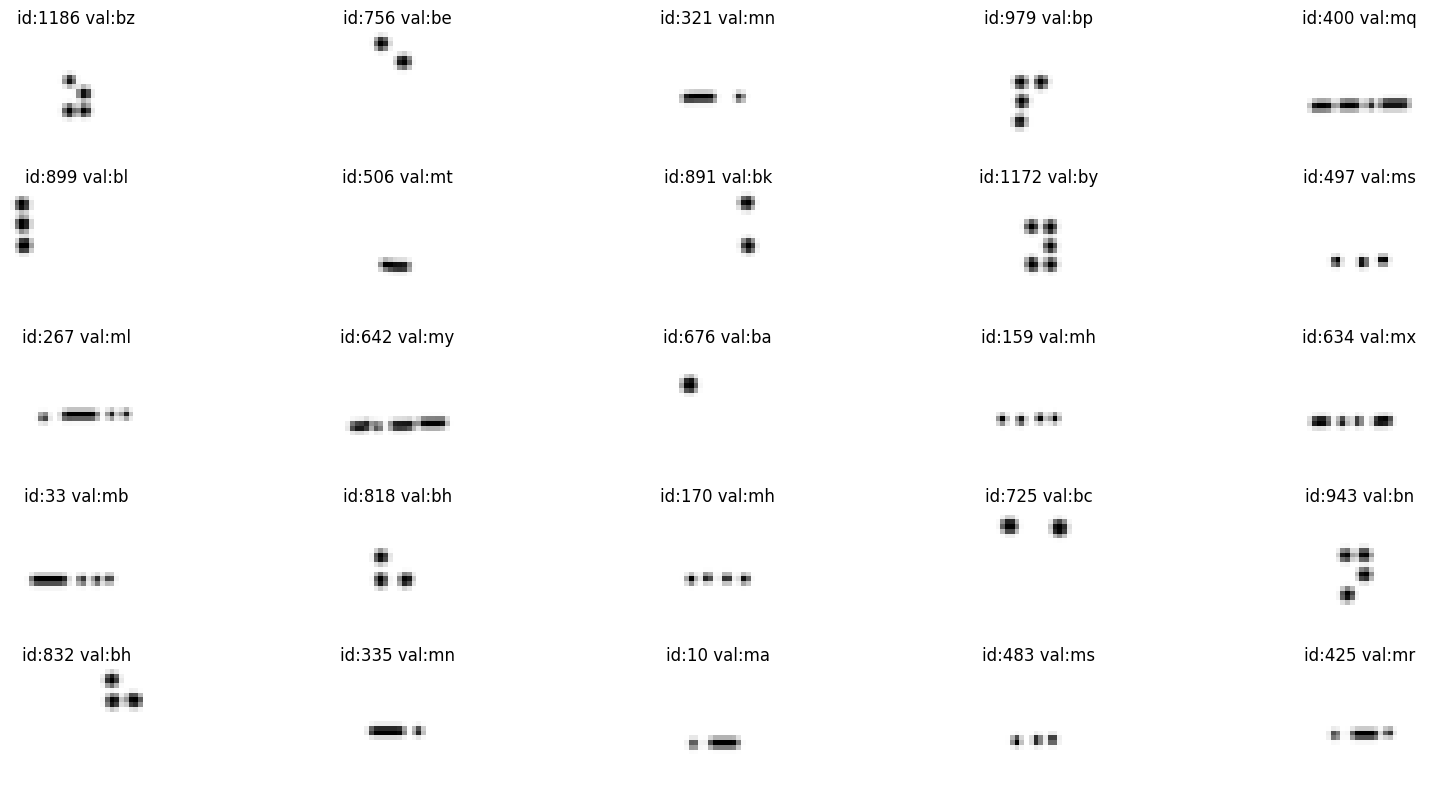

In [21]:
plt.figure(figsize=(20, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx]))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

# Split data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
if X_train.ndim == 3:
    X_train = X_train[..., None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(956, 28, 28, 1) (239, 28, 28, 1)


# Create model

In [23]:
bs = 16
lr = 0.0001

class_mapping = {
    'ma': 0, 'mb': 1, 'mc': 2, 'md': 3, 'me': 4, 'mf': 5, 'mg': 6, 'mh': 7, 'mi': 8, 'mj': 9,
    'mk': 10, 'ml': 11, 'mm': 12, 'mn': 13, 'mo': 14, 'mp': 15, 'mq': 16, 'mr': 17, 'ms': 18, 'mt': 19,
    'mu': 20, 'mv': 21, 'mw': 22, 'mx': 23, 'my': 24, 'mz': 25,
    'ba': 26, 'bb': 27, 'bc': 28, 'bd': 29, 'be': 30, 'bf': 31, 'bg': 32, 'bh': 33, 'bi': 34, 'bj': 35,
    'bk': 36, 'bl': 37, 'bm': 38, 'bn': 39, 'bo': 40, 'bp': 41, 'bq': 42, 'br': 43, 'bs': 44, 'bt': 45,
    'bu': 46, 'bv': 47, 'bw': 48, 'bx': 49, 'by': 50, 'bz': 51
}
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [24]:
from keras.src.layers import MaxPooling2D

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(52, activation='softmax')
])

In [25]:
optimizer1 = Adam(learning_rate=lr)
model.compile(optimizer=optimizer1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 128)        

# Train model

In [26]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=150, validation_data=(X_test, y_test))
model.save('model.keras')

Epoch 1/150
60/60 [==============================] - 2s 18ms/step - loss: 3.9488 - accuracy: 0.0199 - val_loss: 3.9427 - val_accuracy: 0.0418
Epoch 2/150
60/60 [==============================] - 1s 17ms/step - loss: 3.9344 - accuracy: 0.0513 - val_loss: 3.9145 - val_accuracy: 0.0460
Epoch 3/150
60/60 [==============================] - 1s 17ms/step - loss: 3.8839 - accuracy: 0.0523 - val_loss: 3.7749 - val_accuracy: 0.1004
Epoch 4/150
60/60 [==============================] - 1s 17ms/step - loss: 3.7604 - accuracy: 0.0492 - val_loss: 3.5851 - val_accuracy: 0.0962
Epoch 5/150
60/60 [==============================] - 1s 16ms/step - loss: 3.6373 - accuracy: 0.0680 - val_loss: 3.4357 - val_accuracy: 0.0962
Epoch 6/150
60/60 [==============================] - 1s 16ms/step - loss: 3.5218 - accuracy: 0.0659 - val_loss: 3.2775 - val_accuracy: 0.1381
Epoch 7/150
60/60 [==============================] - 1s 17ms/step - loss: 3.3881 - accuracy: 0.0931 - val_loss: 3.1716 - val_accuracy: 0.1548
Epoch 

# testing model

In [27]:
#Probando modelo

etiqueta_a_symbols = {
    0: 'ma', 1: 'mb', 2: 'mc', 3: 'md', 4: 'me', 5: 'mf', 6: 'mg', 7: 'mh', 8: 'mi', 9: 'mj',
    10: 'mk', 11: 'ml', 12: 'mm', 13: 'mn', 14: 'mo', 15: 'mp', 16: 'mq', 17: 'mr', 18: 'ms', 19: 'mt',
    20: 'mu', 21: 'mv', 22: 'mw', 23: 'mx', 24: 'my', 25: 'mz',
    26: 'ba', 27: 'bb', 28: 'bc', 29: 'bd', 30: 'be', 31: 'bf', 32: 'bg', 33: 'bh', 34: 'bi', 35: 'bj',
    36: 'bk', 37: 'bl', 38: 'bm', 39: 'bn', 40: 'bo', 41: 'bp', 42: 'bq', 43: 'br', 44: 'bs', 45: 'bt',
    46: 'bu', 47: 'bv', 48: 'bw', 49: 'bx', 50: 'by', 51: 'bz'
}

In [28]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
nombre_symbol = etiqueta_a_symbols.get(label, 'unknown')

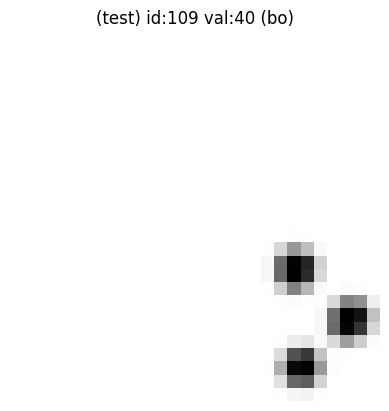

In [29]:
plt.title('(test) id:{} val:{} ({})'.format(idx, label, nombre_symbol))
plt.axis('off')
plt.imshow(-im[:, :, 0], cmap='gray')
plt.show()

In [30]:
#Usando el modelo
salida = model.predict(im[None, :, :, :])[0]

1/1 [==============================] - 0s 48ms/step


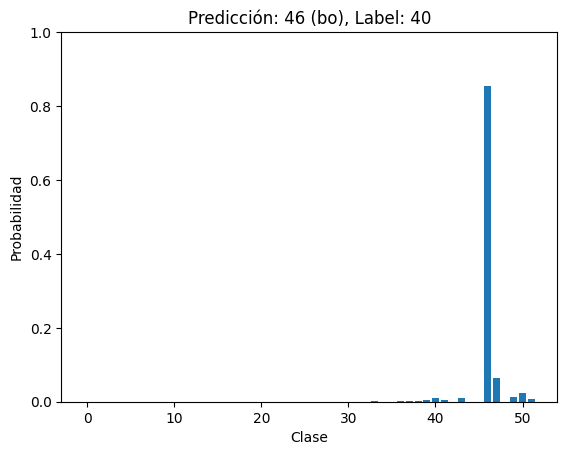

In [31]:
plt.figure()
plt.title("Predicción: {} ({}), Label: {}".format(salida.argmax(), nombre_symbol, label))
plt.ylabel("Probabilidad")
plt.xlabel("Clase")
plt.ylim([0, 1])
plt.bar(np.arange(len(salida)), salida)
plt.show()

In [32]:
predicciones = model.predict(X_test)
etiquetas_predichas = np.argmax(predicciones, axis=1)


8/8 [==============================] - 0s 7ms/step


In [33]:
from sklearn.metrics import accuracy_score


In [34]:
precision = accuracy_score(y_test, etiquetas_predichas)
print(f'Precisión: {precision}')

Precisión: 0.799163179916318


In [35]:
from sklearn.metrics import confusion_matrix

matriz_confusion = confusion_matrix(y_test, etiquetas_predichas)
print('Matriz de Confusión:')
print(matriz_confusion)

Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 3 1 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]
